In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mount Google Drive to access the CSV file
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your CSV file
csv_path = '/content/drive/MyDrive/NY Airbnb Data/AB_NYC_2019.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         ro

In [ ]:
# Remove rows with prices above 350
df_filtered = df[df['price'] <= 350]

# Display the first few rows of the filtered DataFrame
print("Filtered DataFrame:")
print(df_filtered.head())


Filtered DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1   

In [ ]:
df = df.dropna()
# Summary statistics
summary = df.describe()
print(summary)



                 id       host_id      latitude     longitude         price  \
count  3.882100e+04  3.882100e+04  38821.000000  38821.000000  38821.000000   
mean   1.810081e+07  6.424582e+07     40.728129    -73.951149    142.332526   
std    1.069372e+07  7.589752e+07      0.054991      0.046693    196.994756   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.721444e+06  7.029525e+06     40.688640    -73.982460     69.000000   
50%    1.887286e+07  2.837092e+07     40.721710    -73.954810    101.000000   
75%    2.756746e+07  1.018905e+08     40.762990    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38821.000000       38821.000000       38821.000000   
mean         5.869220          29.290255           1.373229   
std         17.389026          48.182900           1.680328   
min          1.000000           1.00

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
# Data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)



Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
# Distribution of room types
room_type_distribution = df['room_type'].value_counts()
print("Room Type Distribution:")
print(room_type_distribution)



Room Type Distribution:
Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64


In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                                      id   host_id  latitude  longitude  \
id                              1.000000  0.591480 -0.010085   0.103336   
host_id                         0.591480  1.000000  0.012823   0.141276   
latitude                       -0.010085  0.012823  1.000000   0.088259   
longitude                       0.103336  0.141276  0.088259   1.000000   
price                          -0.006696  0.006263  0.031344  -0.155298   
minimum_nights                 -0.073937 -0.051673  0.024893  -0.055414   
number_of_reviews              -0.330019 -0.141973 -0.008559   0.054746   
reviews_per_month               0.291786  0.296274 -0.010117   0.146228   
calculated_host_listings_count  0.098446  0.149417  0.004340  -0.093348   
availability_365                0.006624  0.155361 -0.021921   0.102573   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.006696       -0.073937          -0.330019

<ipython-input-186-7592cbfde920>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


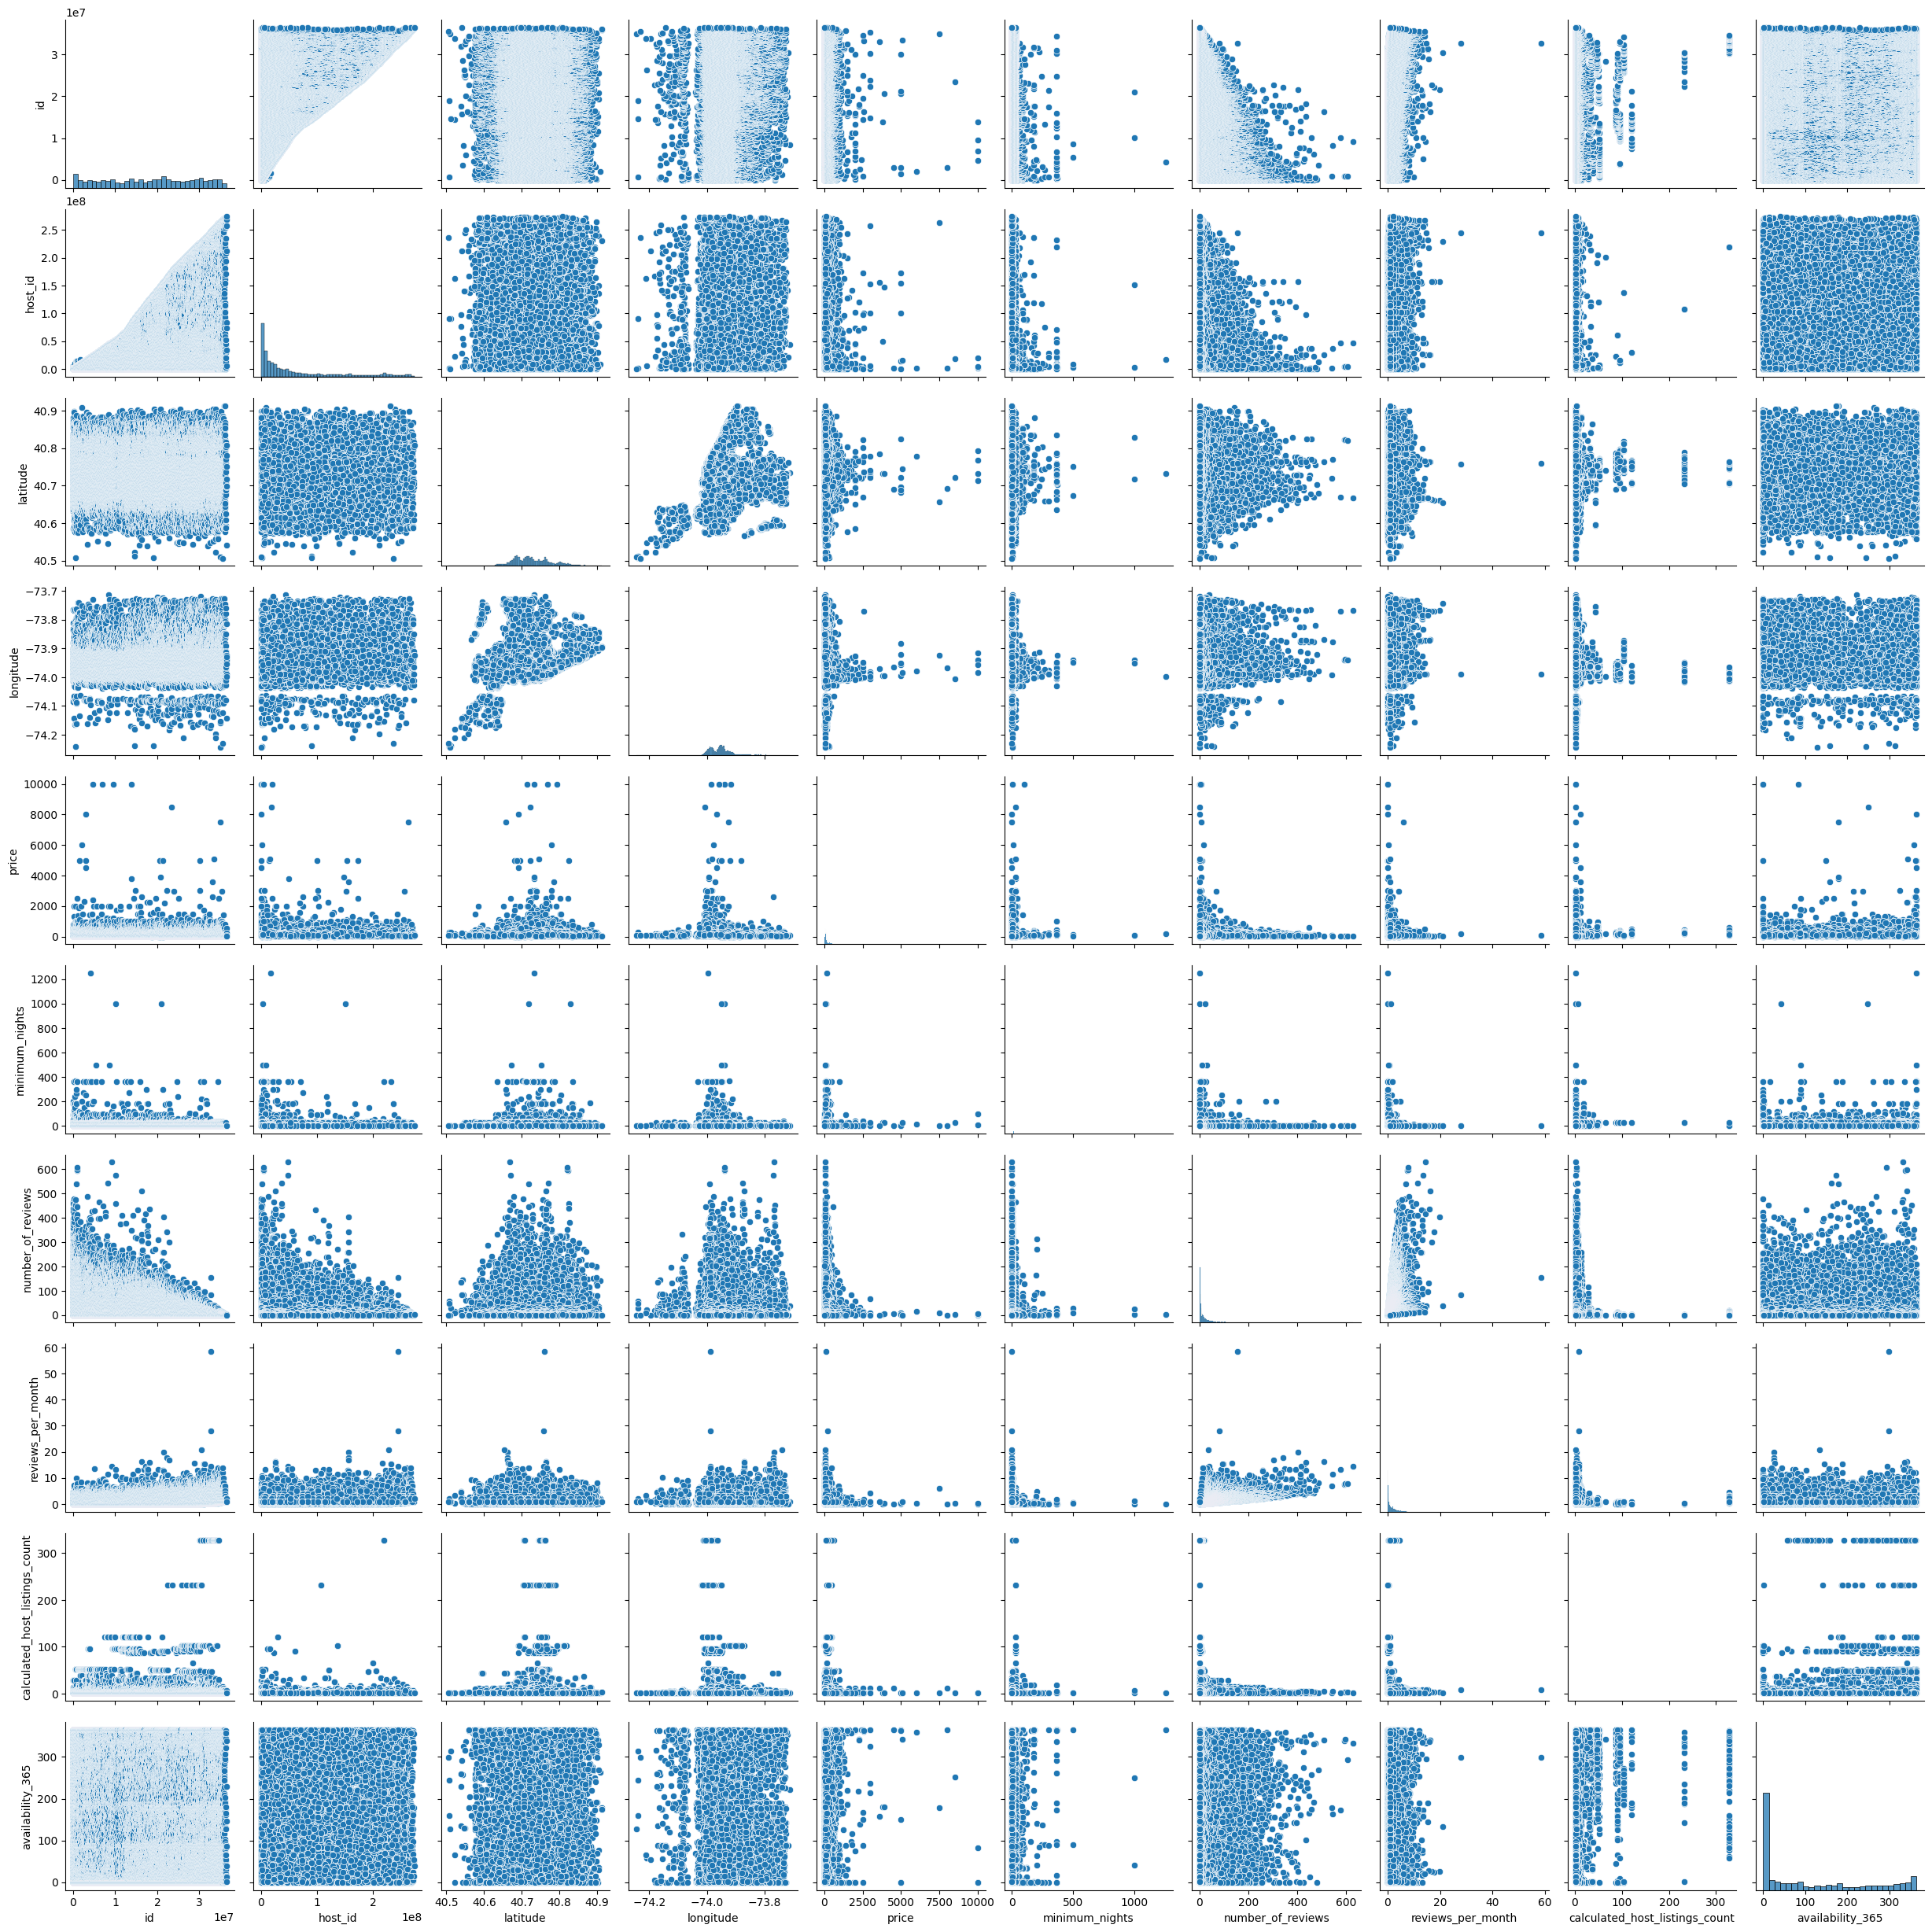

In [ ]:
# Visualize the data
sns.pairplot(df)
plt.show()

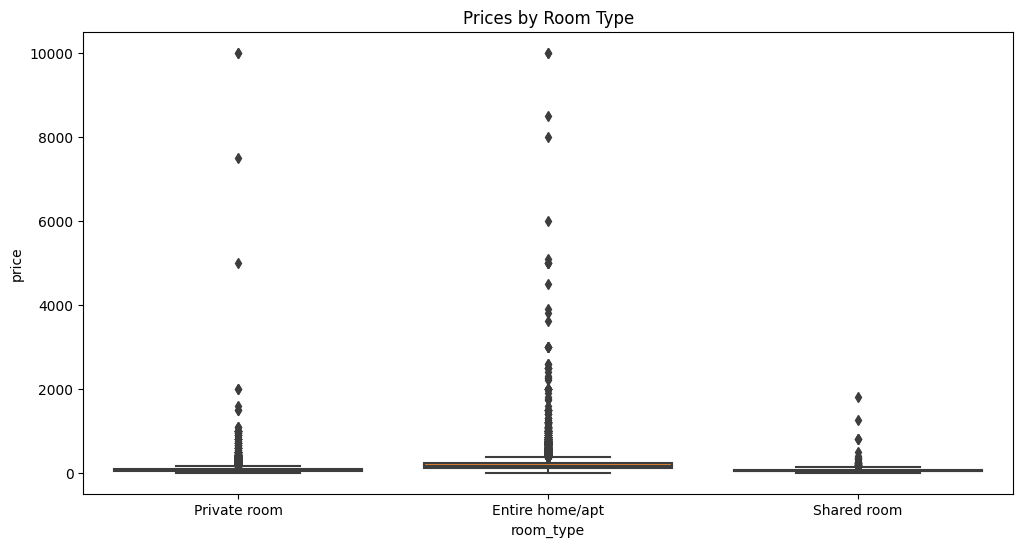

In [ ]:
# Boxplot of prices by room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Prices by Room Type')
plt.show()

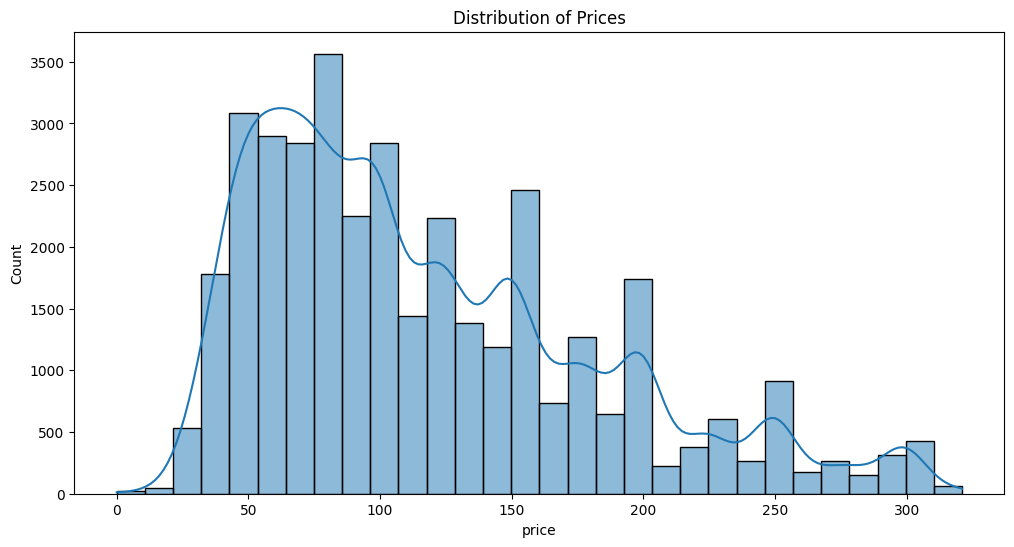

In [ ]:
# Histogram of prices
plt.figure(figsize=(12, 6))
sns.histplot(final_df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()


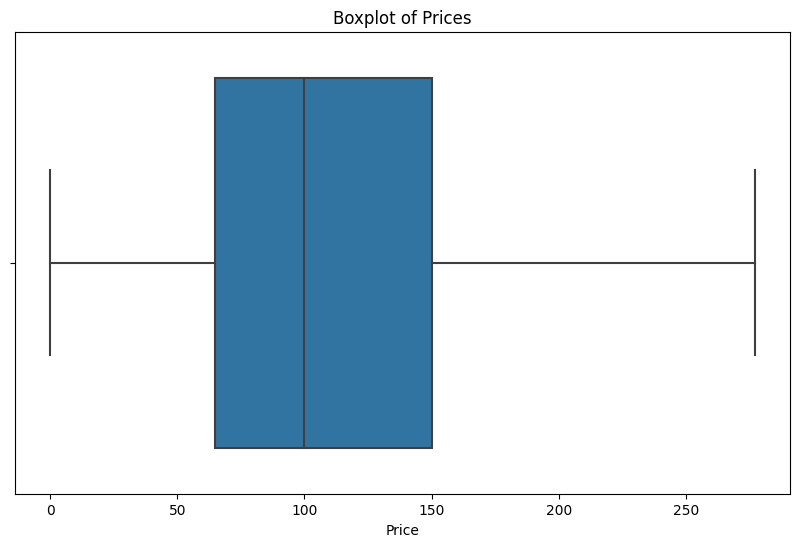

In [ ]:
# Identifing outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# the first few rows of the DataFrame after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

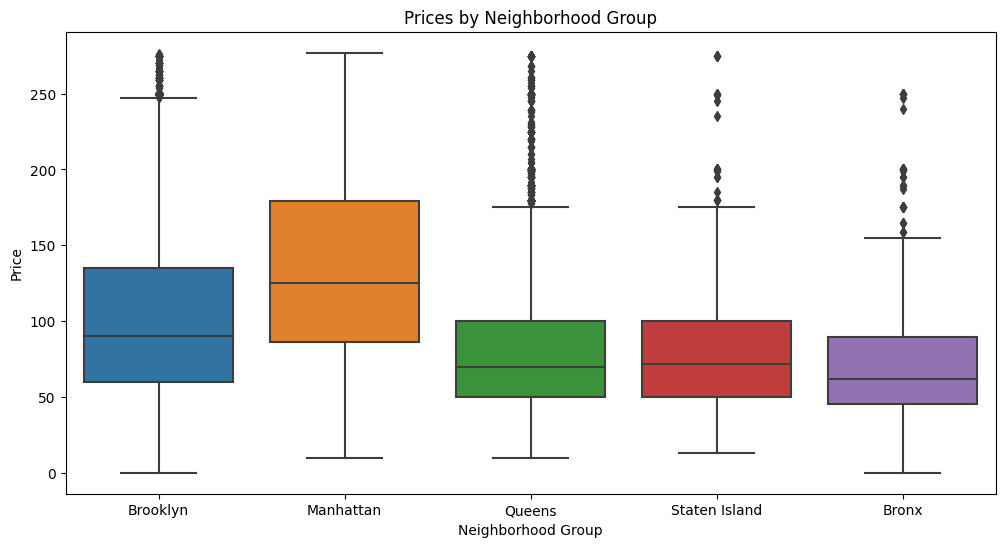

In [ ]:
# Distribution of prices by neighborhood group
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()

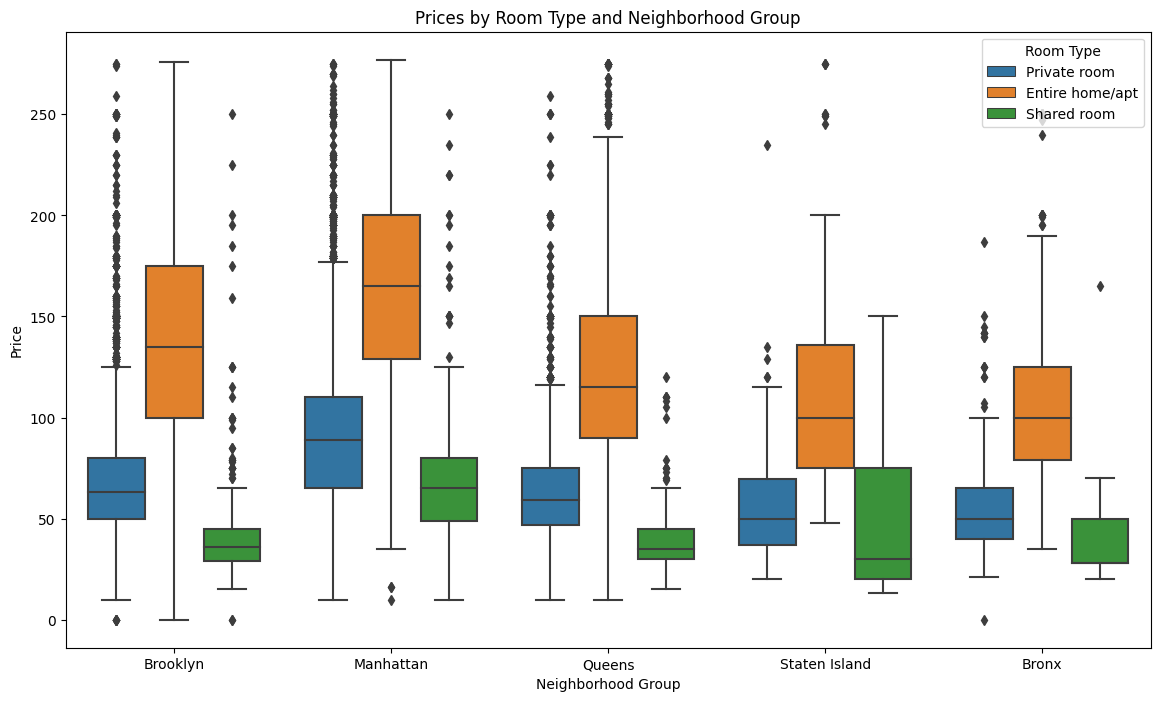

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df)
plt.title('Prices by Room Type and Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

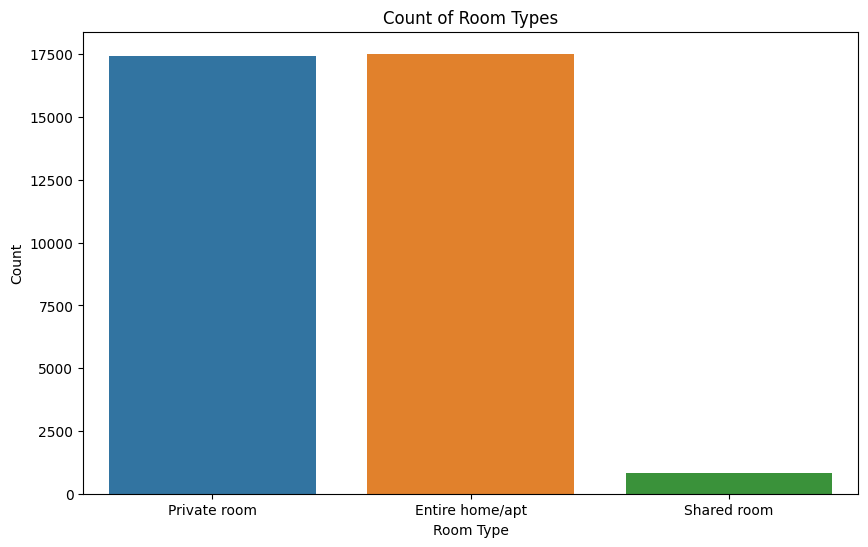

In [ ]:
# Countplot of room types
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

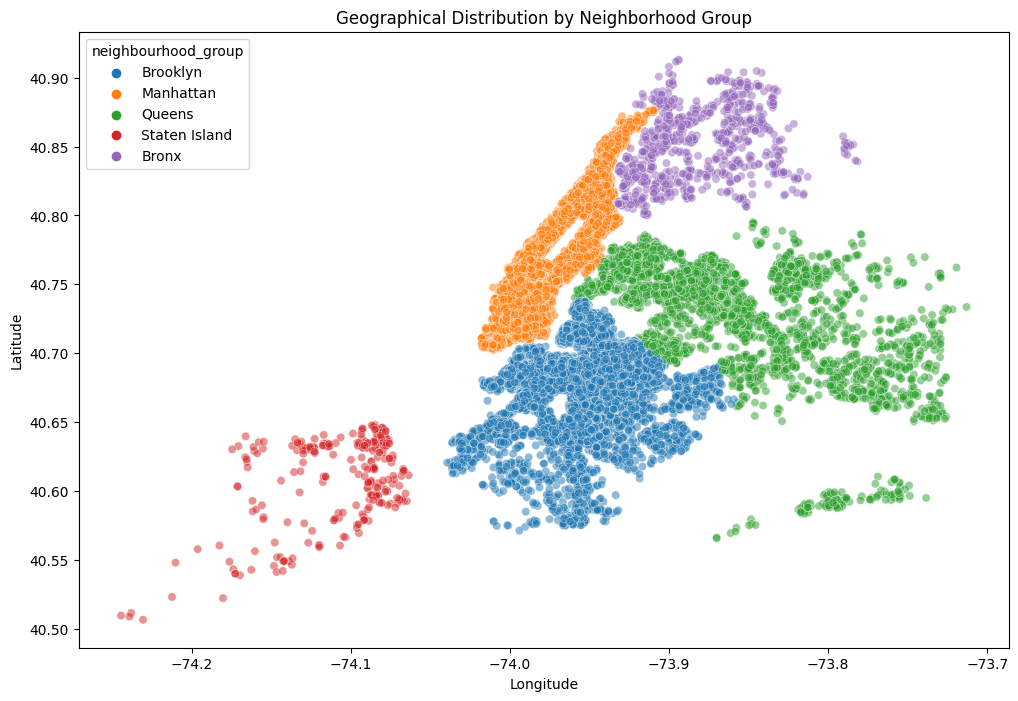

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Geographical Distribution by Neighborhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<ipython-input-196-64b246a95774>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


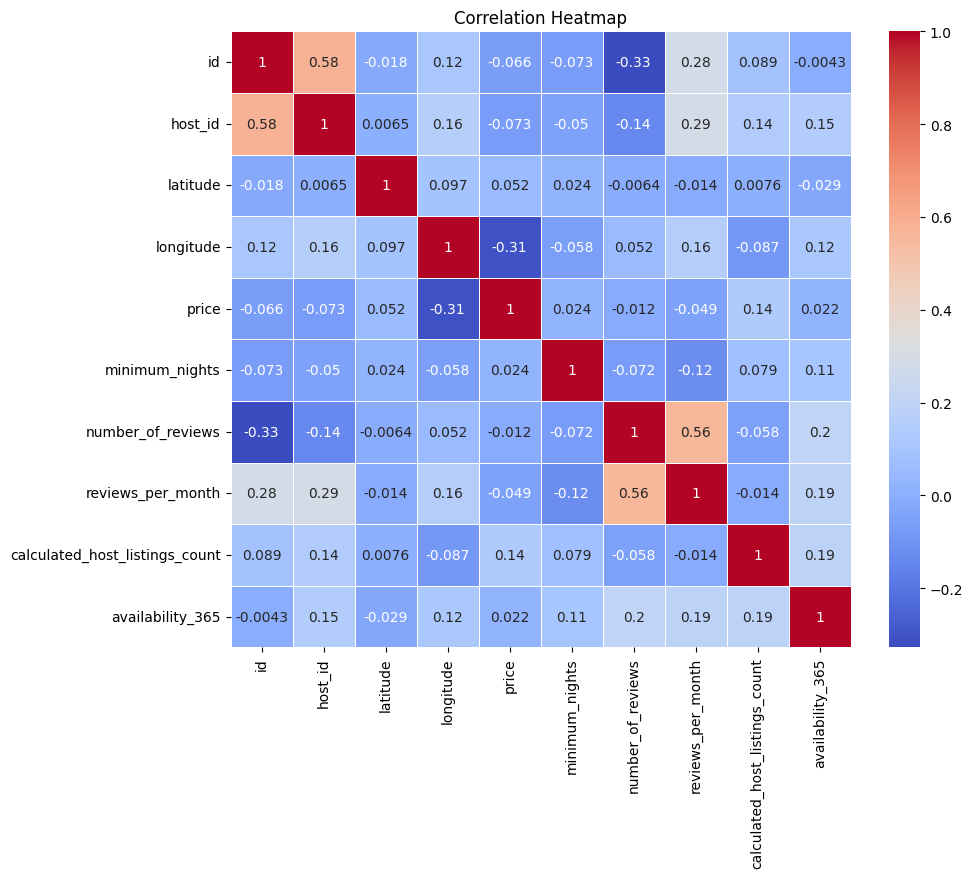

In [ ]:
# Heatmap of correlations between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

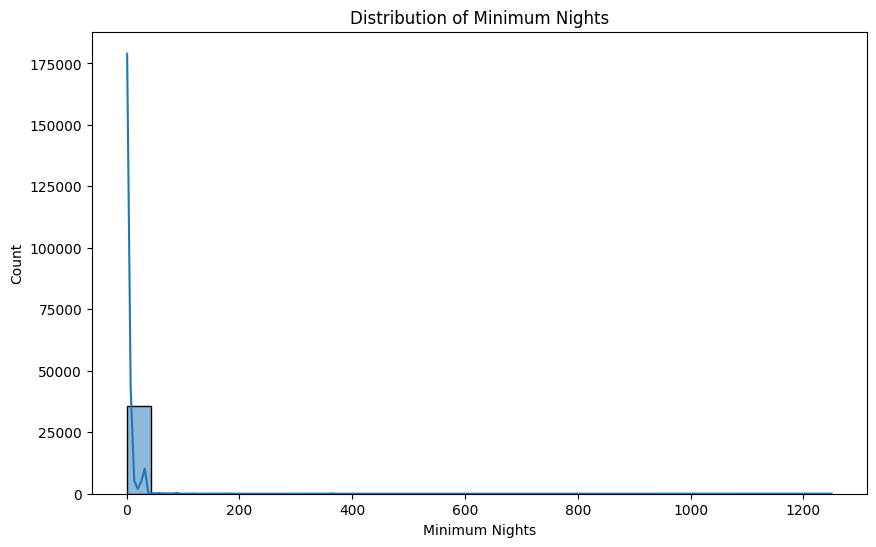

In [ ]:
# distribution of minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.show()


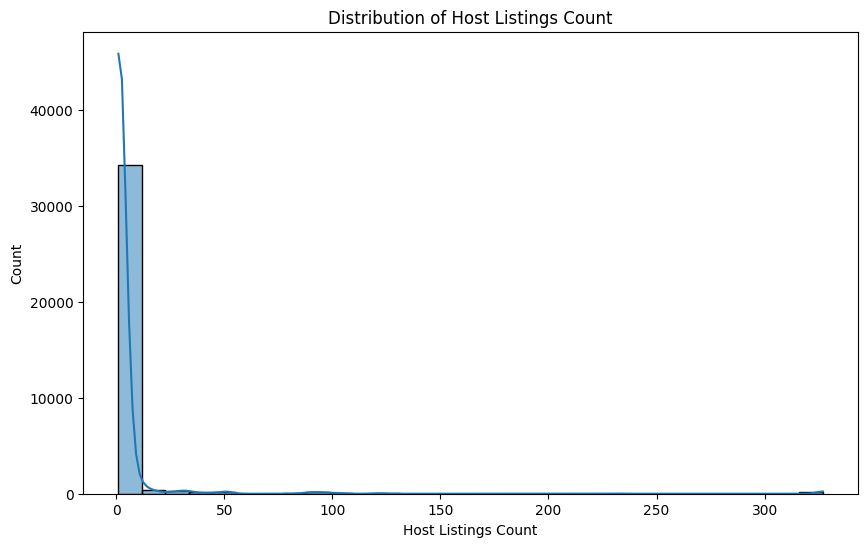

In [ ]:
# distribution of host listings count
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=30, kde=True)
plt.title('Distribution of Host Listings Count')
plt.xlabel('Host Listings Count')
plt.ylabel('Count')
plt.show()


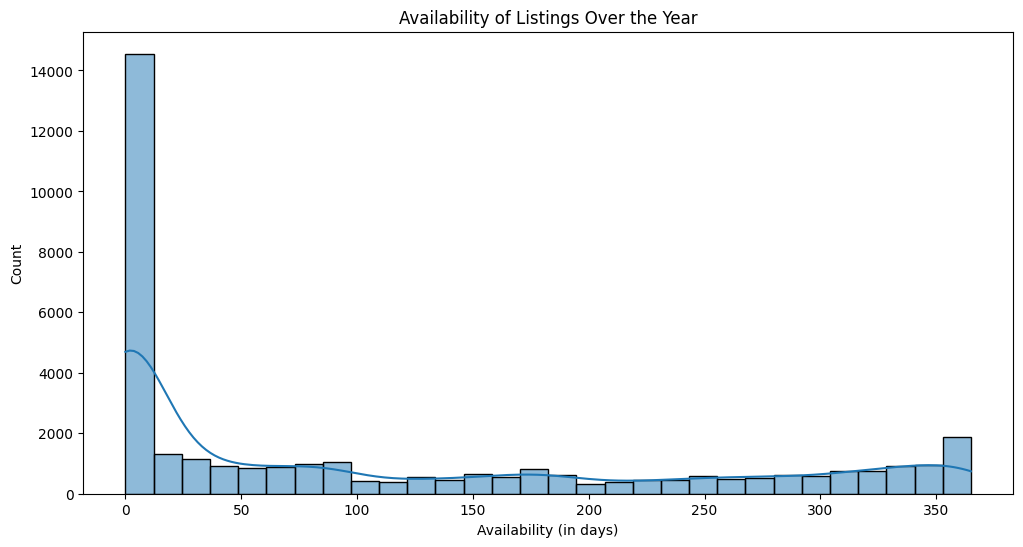

In [ ]:
# availability over the year
plt.figure(figsize=(12, 6))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title('Availability of Listings Over the Year')
plt.xlabel('Availability (in days)')
plt.ylabel('Count')
plt.show()


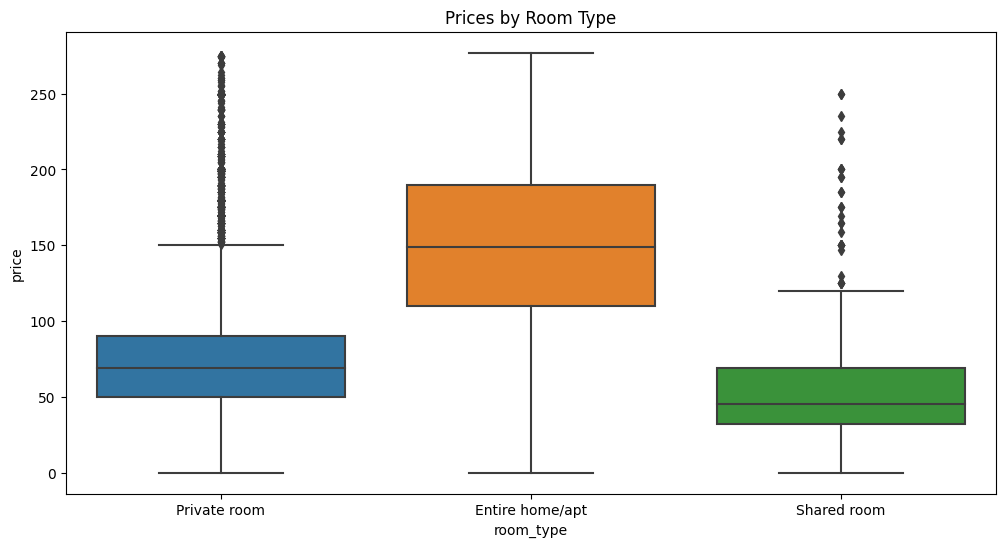

In [ ]:
# Boxplot of prices by room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Prices by Room Type')
plt.show()
